## 画像工学特論課題 1
### フーリエ級数展開における有限項近似の誤差
<div style="text-align: right"> エネルギー環境システム専攻修士課程1年 26213167 </div>
<div style="text-align: right"> 和田拓弥 </div>

#### 関数 $ f(x) $ の有限区間の複素フーリエ級数展開を以下で定義する．

$$
f(x) = \sum_{m=-\infty}^{\infty} F_{k_m}e^{ik_mx} \\
F_{k_m} = \frac{1}{2l}\int_{-l}^{+l}f(x)e^{-ik_mx}dx, \quad k_m = \frac{m\pi}{l}
$$

#### 以下の関数 $ f(x) $ について区間 $ [−1, +1] $ でのフーリエ級数表現を示しなさい．($ F_{k_m} $ を解析的(数学的)に求める)

$$
f(x) = \left\{
\begin{array}{ll}
1 & (|x| \lt 1/2) \\
0 & (1/2 \leq |x| \lt 1)
\end{array}
\right.
$$


#### 解
$ l = 1 $ として $ F_{k_m} $ は以下のように表せる．

$$
F_{k_m} = \frac{1}{2}\int_{-1}^{+1}f(x)e^{-ik_mx}dx, \quad k_m = m\pi
$$


1. $ m = 0 $ のとき


$$
\begin{eqnarray}
F_{k_m} &=& \frac{1}{2}\int_{-1}^{+1}f(x)dx \\
        &=& \frac{1}{2}\int_{-1}^{+1}dx \\
        &=& \frac{1}{2}
\end{eqnarray}
$$


2. $ m \neq 0 $ のとき

$$
\begin{eqnarray}
F_{k_m} &=& \frac{1}{2}\int_{-\frac{1}{2}}^{+\frac{1}{2}}e^{-im\pi x}dx \\
        &=& \frac{1}{2}\frac{1}{-im\pi}[e^{-im\pi x}]_{-\frac{1}{2}}^{\frac{1}{2}} \\
        &=& -\frac{1}{2im\pi}(-2i\sin\frac{m\pi}{2}) \\
        &=& \frac{1}{m\pi}\sin\frac{m\pi}{2}
\end{eqnarray}
$$

#### フーリエ級数展開の第$ M $次項までの有限項で打ち切った近似関数関数を $ f′_M (x) $ とする．

$$
f'_M(x) = \sum_{m=-M}^{+M} F_{k_m}e^{ik_mx} \\
$$

#### 打ち切り次数$ M $が$ M = 0, 1, ... , 10 $のそれぞれの場合について，$ f′_M (x) $ を図示しなさい．


#### 解
1. $ M = 0 $ のとき

$$
f'_0(x) = \frac{1}{2}
$$

2. $ M \gt 0 $ のとき

$$
f'_M(x) = \sum_{m=-M}^{-1} \frac{1}{m\pi}\sin\frac{m\pi}{2}e^{im\pi x} + \frac{1}{2} + \sum_{m=1}^{M} \frac{1}{m\pi}\sin\frac{m\pi}{2}e^{im\pi x}
$$


1, 2の結果を踏まえて$ M = 0, 1, ..., 10 $ の各条件における　$ f′_M (x) $ のグラフは以下の通り．

/Users/loblium/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


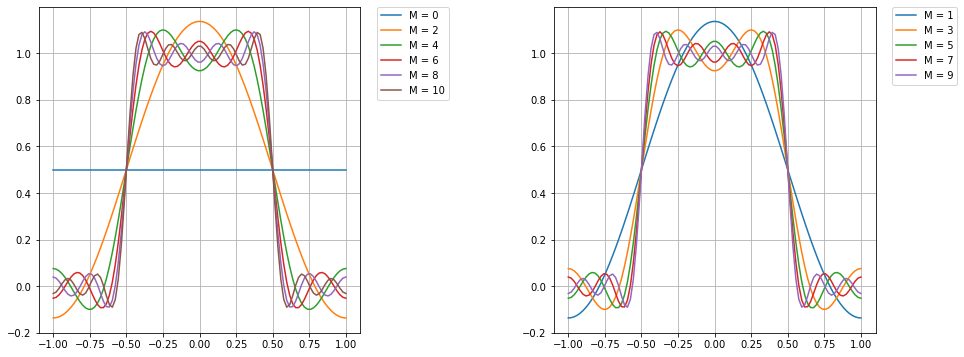

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


x = np.linspace(-1, 1, 100)
f_list = []

# case 1. M = 0
f = np.full_like(x, 1 / 2)
f_list.append(f)

# case 2. M > 0
for M in range(1, 11):
    f = 1 / 2  # center
    for m in range(1, M + 1):
        # add left and right side
        f += 1 / -m / np.pi * np.sin(-m * np.pi / 2) * np.exp(1j * -m * np.pi * x) \
            + 1 / m / np.pi * np.sin(m * np.pi / 2) * np.exp(1j * m * np.pi * x)
    f_list.append(f.astype(float))

# graph
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15.0, 6.0))
plt.subplots_adjust(wspace=0.6)

for M in range(0, 11):
    if M % 2 == 0:
        axes[0].plot(x, f_list[M], label=f"M = {M}")
    else:
        axes[1].plot(x, f_list[M], label=f"M = {M}")

axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)

axes[0].grid()
axes[1].grid()

plt.show()

上図より$ M $の増加に伴い，$ f′_M (x) $ の概形は $ f(x) $ に近づいていくことが分かる．$ M = 0 $ の条件ではサンプリング定理を満たさないことによる振動の消失が確認された．さらに偶奇について，$ M = 2m, 2m + 1 $と表した際の$ m $の結果に違いが見られないことが確認された．
不連続点の$ x = -\frac{1}{2}, \frac{1}{2} $ の前後にはGibbbs現象が見られた．$ M $を増加すればこの減衰は小さくなる傾向を示した一方で，近傍の誤差については依然として残留している．